# Data Enhancement 
                                    TP Introduction
                                    sarah.laroui@inria.fr
                                    16/09-2021
                                

A report in pairs is to be returned by email no later than 23/09.

---
ANDRIEU Grégoire

GILLE Cyprien

## Introduction: 
We can define an image as a 2D function (monochrome image) of the light intensity, u (x, y), depending on the spatial location (x and y are the spatial coordinates).

A digital image is an image whose spatial domain and luminosity have been discretized. We can represent it by a 2D matrix. Each element of the matrix is a pixel, represented by its coordinates (i, j) and its value v = p (i, j), commonly called gray level. The images are most often coded in 256 levels of gray (8-bit coding). This is called the dynamics of the image. This lab uses several images that you can retrieve from Milestone.


In [1]:
# Useful fonctions and imports
import matplotlib.pyplot as plt
import numpy as np


The imread function of Pyplot allows you to load an image's content and recognizes most of the file formats used in image processing.

1. Import and display the image of Lena with pyplot.

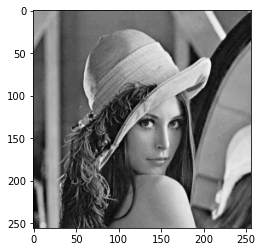

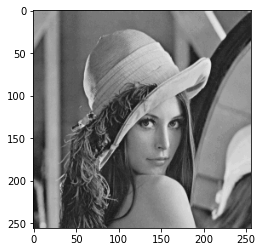

In [2]:
## Insert code here
lena= np.float64(plt.imread('lena_gray_512.tif'))

plt.imshow(lena, cmap='gray')
plt.show()
plt.imshow(lena, cmap='gray', vmin=0, vmax=255)
plt.show()


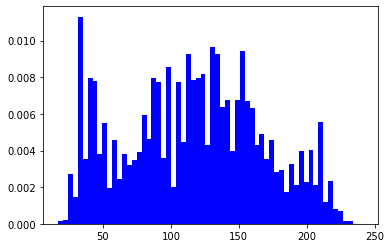

In [3]:
plt.hist(lena, bins="auto", density=True, stacked=True, color=['blue']*256)
plt.show()

In [4]:
# Setting the range of the colormap from 0 to 255 seems to make black pixels less black (in the hair for example), 
# and white pixels less white (in the eyes for example).
# This makes sense because the darkest pixels of the original image are not at 0 (and the brightest are not at 255), 
# as seen in the histogram. 
# Therefore, without the vmin and vmax args, the colormap had a range of around 20 to around 240

## Histogram
The histogram of an image makes it possible to represent the pixels' probability density within this image.

Let h_u (v) be the function equal to the number of pixels of intensity v within the image u; then we can define the probability density P_u (v) by:
$$
P_u(v)=\frac{h_u(v)}{n_cn_l}
$$

By modifying this density of probability, we play on the characteristics of the image. One can, for example, break down operations of the contrast enhancement type thanks to histogram transformations.

## Simple transformations 
A histogram transformation algorithm looks like this:
    - For each pixel p of the image, read its intensity v.
    - Replace v by T (v).
    
The function T is called histogram transformation.
1. Transform the histogram of the Lena image using the following T fonts:
$$
T(v)= \begin{cases}
255 \text{ si } v>128\\
0 \text{ sinon }
\end{cases}
$$

$$
T(v)=255-v
$$



In [5]:
# First transformation
T_lena1 = np.where(lena > 128, 255, 0)

# Second transformation
T_lena2 = 255 - lena

2. Observe the transformed images and try to name each transformation.

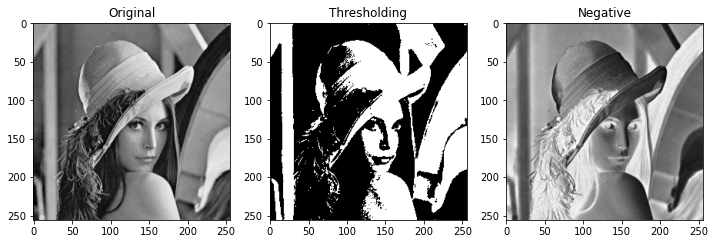

In [6]:
plt.figure(figsize=(12, 8)) # to see the images better

# original
plt.subplot(131)
plt.imshow(lena, cmap="gray")
plt.title("Original")

# first transformation : thresholding
plt.subplot(132)
plt.imshow(T_lena1, cmap="gray")
plt.title("Thresholding")

# second transformation : negative/inverse
plt.subplot(133)
plt.imshow(T_lena2, cmap="gray")
plt.title("Negative")
plt.show()

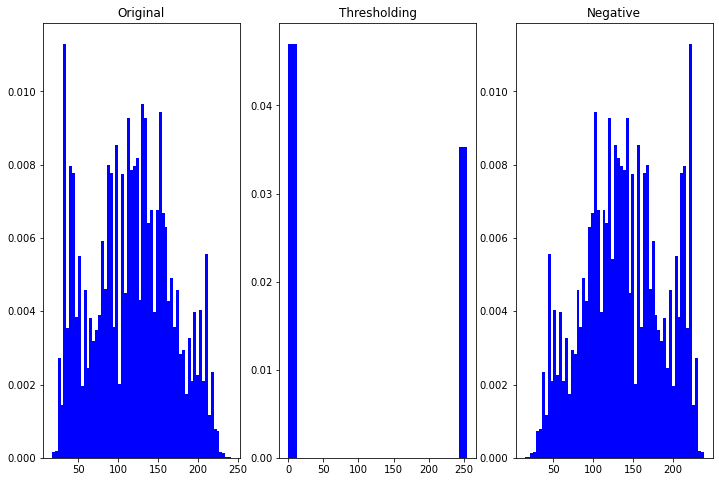

In [7]:
# Histograms to confirm the names we gave to each transformation

plt.figure(figsize=(12, 8)) # to see the images better

# original
plt.subplot(131)
plt.hist(lena, bins="auto", density=True, color=["blue"]*256, stacked=True)
plt.title("Original")

# first transformation : thresholding
plt.subplot(132)
plt.hist(T_lena1, bins="auto", density=True, color=['blue']*256, stacked=True)
plt.title("Thresholding")

# second transformation : negative/inverse
plt.subplot(133)
plt.hist(T_lena2, bins="auto", density=True, color=['blue']*256, stacked=True)
plt.title("Negative")
plt.show()

## Improved dynamics
1. Display the Clown image


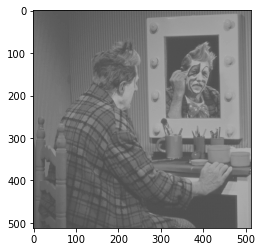

In [8]:
clown = np.float64(plt.imread('CLOWN_LUMI2.BMP'))

plt.imshow(clown, cmap="gray", vmin=0, vmax=255)
plt.show()

We can clearly see that the dynamic of the Clown image is not very important. However, the more the dynamic is spread, the better the quality of the image.

1. By defining a and b as the lower and upper limits respectively of the histogram of the input image, write the function T allowing to use all the dynamics (from 0 to 255) of the image.

In [9]:
a = np.min(clown)
b = np.max(clown)
def T(x):
    #normalize
    r = x - a 
    r /= b-a
    # spread between 0 and 255
    r *= 255
    return r.astype(int)

T_clown = T(clown)

2. Apply this transformation to the clown image and comment on the result. Display the corresponding histograms.

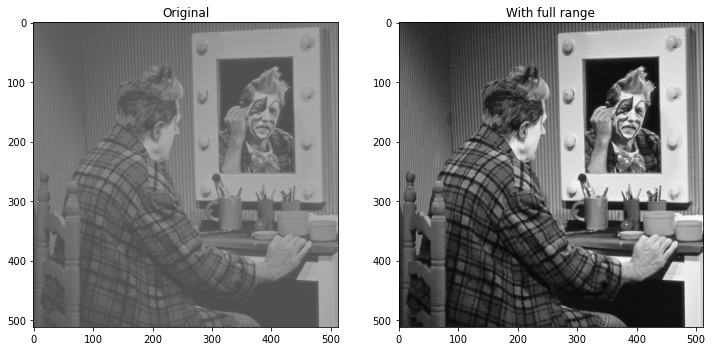

In [10]:
plt.figure(figsize=(12, 8)) # to see the images better

# original
plt.subplot(121)
plt.imshow(clown, cmap="gray", vmin=0, vmax=255)
plt.title("Original")

# With the full range
plt.subplot(122)
plt.imshow(T_clown, cmap="gray", vmin=0, vmax=255)
plt.title("With full range")

plt.show()

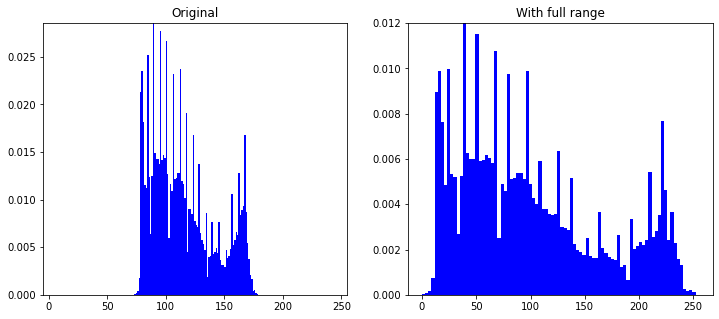

In [11]:
# Histograms

plt.figure(figsize=(12, 5)) # to see the images better

# original
plt.subplot(121)
plt.hist(clown, bins="auto", density=True, color=["blue"]*512, stacked=True)
plt.xlim((-5, 255))
plt.title("Original")

# full range
plt.subplot(122)
plt.hist(T_clown, bins="auto", density=True, color=['blue']*512, stacked=True)
plt.title("With full range")

plt.show()

Comment here

In [12]:
# Using the full range allows for more details and sharper contrast

### Cumulative histogram

The cumulative histogram is a histogram that considers all the pixels whose value is less than or equal to the current gray level. This number is normalized by dividing by the total number of pixels.

Its best-known application is the histogram equalization, which consists of making the probability density of the pixels, P_u (v), tend towards a uniform law (we "spread" the histogram). This is obtained via the following transformation:

$$
T(v) = 255H_c(v)
$$
where H_c is the cumulative histogram. 

1. Apply this transformation on the previous image and comment.

In [13]:
# keep the dimensions for the normalization
cl_xdim, cl_ydim = clown.shape
N = cl_xdim*cl_ydim
# compute Hc
prev_n_pixels = 0
Hc = []
for val in range(256):
    n_pixels = np.count_nonzero(clown.astype(int) == val)
    Hc.append((prev_n_pixels + n_pixels)/N)
    prev_n_pixels += n_pixels

In [14]:
# transform the image
histo_eq = np.vectorize(lambda v : 255*Hc[v])
Eq_clown = histo_eq(clown.astype(int))

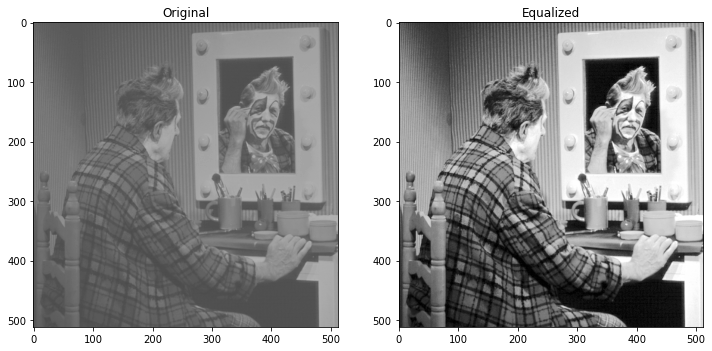

In [15]:
# display the images
plt.figure(figsize=(12, 8)) # to see the images better

# original 
plt.subplot(121)
plt.imshow(clown, cmap="gray", vmin=0, vmax=255)
plt.title("Original")

# Equalized
plt.subplot(122)
plt.imshow(Eq_clown, cmap="gray", vmin=0, vmax=255)
plt.title("Equalized")

plt.show()

In [16]:
#  Equalization really brings out the contrast, letting details stand out (e.g. in the vest)

2. Check the histogram of the output image to visualize the equalization operation.

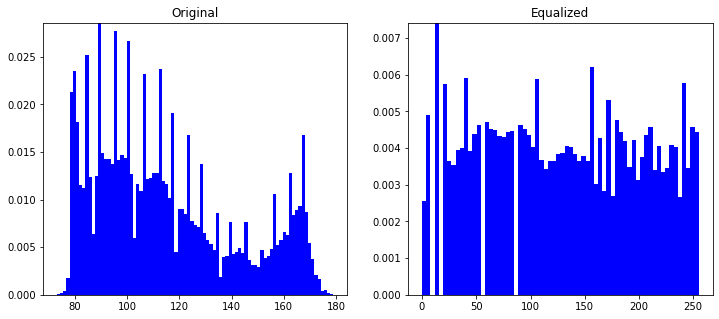

In [17]:
# Histograms

plt.figure(figsize=(12, 5)) # to see the graphs better

# original
plt.subplot(121)
plt.hist(clown, bins="auto", density=True, color=["blue"]*512, stacked=True)
plt.title("Original")

# Equalized
plt.subplot(122)
plt.hist(Eq_clown, bins="auto", density=True, color=['blue']*512, stacked=True)
plt.title("Equalized")

plt.show()

# Filtering
## Definitions
Filtering is an operation often used in image processing. For example, filtering makes it possible to reduce the image's noise. This filtering can be linear or nonlinear.

In the case of a linear filter, the filtering operation can be carried out using a convolution product. Let h be the convolution filter or mask, the convolution operation 
$$
w=u*h
$$
is defined in discrete by:
$$
w(i,j)=\sum_{n=1}^{n_l}\sum_{m=1}^{n_c} u(n,m)h(i-n,j-m)
$$
we consider here that h is periodic outside of ${1,..., n_l}x {1,...,n_c}$.

The function (python function TO FIND) makes it possible to carry out the operation of filtering the image u by the convolution mask h.

The most used nonlinear filtering is the median filter. This filter replaces the value of a pixel with the median of the values of its neighbors. This filtering consists of:

- Find and order the neighbors' values of the current pixel v (according to a mask with a size of K * K).
- Select the value located on the median and replace v by this value.

## Applications
1. Define the following two convolution masks:
$$
h_1=\frac{1}{9} \left[\begin{matrix}
1 & 1 & 1 \\
1 & 1 & 1\\
1 & 1 & 1
\end{matrix}\right] \quad h_2= \left[\begin{matrix}
0 & 1 & 0 \\
1 & -4 & 1\\
0 & 1 & 0
\end{matrix}\right]
$$

In [18]:
h1 = np.ones((3, 3))/9
h2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

2. Comment on the image filtered by these convolution masks. The starting image can be the image of Lena.

In [19]:
from cv2 import filter2D, randn, medianBlur

In [20]:
h1_lena = filter2D(src=lena, kernel=h1, ddepth=-1)
h2_lena = filter2D(src=lena, kernel=h2, ddepth=-1)

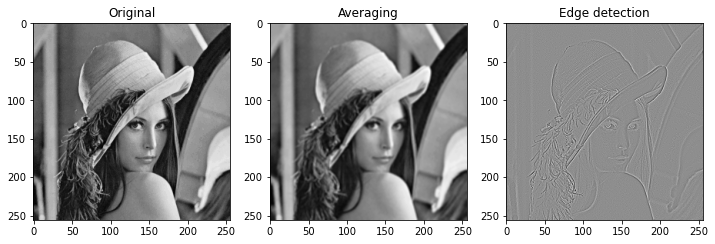

In [21]:
plt.figure(figsize=(12, 8)) # to see the images better

# original
plt.subplot(131)
plt.imshow(lena, cmap="gray")
plt.title("Original")

# first convolution : averaging
plt.subplot(132)
plt.imshow(h1_lena, cmap="gray")
plt.title("Averaging")

# second convolution : edge detection
plt.subplot(133)
plt.imshow(h2_lena, cmap="gray")
plt.title("Edge detection")
plt.show()

In [22]:
# the first mask averages the nine pixel values covered by the mask, 
# while the second only gives a big value when there is a  sudden change in luminosity, thus finding the edges

One of the applications where filtering is widely used is noise attenuation. Noise is an alteration of the image: All the relevant information in the image is not simply accessible. Filtering, therefore, consists in finding as much information as possible in the noisy image. Some filters are recommended depending on the type of noise.

4. Load the image Lena and noise it by adding an additive and random noise following a Gaussian distribution with zero mean and standard deviation 20.

In [23]:
gauss_noise = randn(lena.copy(), (0), (20))
gauss_lena = (lena + gauss_noise)

5. Observe the output image of the averaging filter and the median filter, then comment.

In [24]:
h1_gauss_lena = filter2D(src=gauss_lena, kernel=h1, ddepth=-1)
median_gauss_lena = medianBlur(np.float32(gauss_lena), 5)

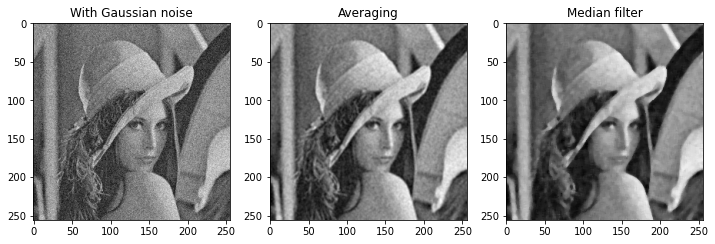

In [25]:
plt.figure(figsize=(12, 8)) # to see the images better

# With gaussian noise
plt.subplot(131)
plt.imshow(gauss_lena, cmap="gray")
plt.title("With Gaussian noise")

# After averaging filter
plt.subplot(132)
plt.imshow(h1_gauss_lena, cmap="gray")
plt.title("Averaging")

# after median filter
plt.subplot(133)
plt.imshow(median_gauss_lena, cmap="gray")
plt.title("Median filter")
plt.show()

In [26]:
# The averaging filter removes less noise than the median filter, but also loses less details

6. Proceed in the same way by noising the image with "salt and pepper" noise (probability 10%) using a python function (TO FIND).


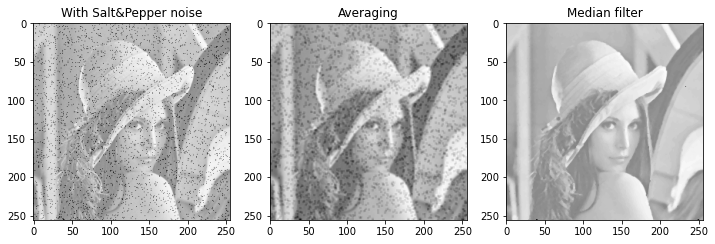

In [27]:
# noise and pepper 
from skimage.util import random_noise
sp_lena = lena + 255*random_noise(lena, mode="s&p", amount=0.1)

# filters
h1_sp_lena = filter2D(src=sp_lena, kernel=h1, ddepth=-1)
median_sp_lena = medianBlur(np.float32(sp_lena), 3) # kernel size 3 is enough for s&p noise

# display
plt.figure(figsize=(12, 8)) # to see the images better

# With s&p noise
plt.subplot(131)
plt.imshow(sp_lena, cmap="gray")
plt.title("With Salt&Pepper noise")

# After averaging filter
plt.subplot(132)
plt.imshow(h1_sp_lena, cmap="gray")
plt.title("Averaging")

# after median filter
plt.subplot(133)
plt.imshow(median_sp_lena, cmap="gray")
plt.title("Median filter")
plt.show()

7. Comment

In [28]:
# The median filter manages to almost perfectly get the original image, with minimal blurring (since the kernel is small).

# Fourier transform
## Definitions
The Fourier transform makes it possible to represent temporal information (spatial in 2D) in frequency information. The discrete 2D Fourier transformation is written:
$$
\hat{u} (v,w) = \frac{1}{n_l n_c} \sum_{n=0}^{n_l-1}\sum_{m=0}^{n_c-1} u(n,m)\exp^{-j2\pi\left(\frac{vn}{n_c}+\frac{wm}{n_l}\right)}
$$
We usually represent the logarithm (to accentuate the contrast) of the modulus of the "refocused" Fourier transform using the fftshift function.

Calculate the Fourier transform (python function TO FIND) of the Lena image and display its module.

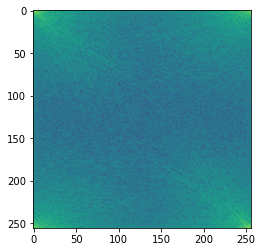

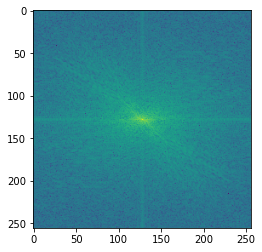

In [29]:
lena = np.float64(plt.imread('lena_gray_512.tif'))
lena_fourier = (np.fft.fft2(lena))
lena_fourier2 = np.fft.fftshift(np.fft.fft2(lena))
plt.imshow(np.log(abs(lena_fourier)**2))
plt.show()
plt.imshow(np.log(abs(lena_fourier2)**2))
plt.show()

#### 4.2 Frequency filtering

As previously, we will perform a filtering operation but in the frequency domain this time. This is done in 3 steps.
1. Calculation of the Fourier transforms of the image u and of the filter h.
2. Term-to-term multiplication in the frequency domain.
3. Inverse transform.

Create a square mask h, containing only 1s, of size 5 X 5. Normalize this filter then calculate and display its Fourier transform.



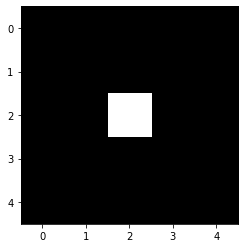

In [30]:
mask = np.ones((5,5))
mask_norm = mask/np.sum(mask)
mask_fourier = np.fft.fftshift(np.fft.fft2(mask_norm))
mask_fourier_to_display = np.abs(mask_fourier)**2
plt.imshow(mask_fourier_to_display, cmap='gray')
plt.show()

What is this type of filter?

In [31]:
#This is an ideal low-pass filter

Perform filtering as described above.

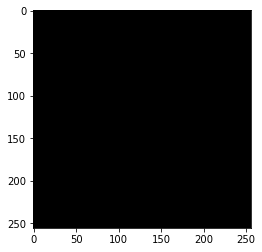

In [32]:
mask = np.ones((256,256))
mask_norm = mask/np.sum(mask)
mask_fourier = np.fft.fftshift(np.fft.fft2(mask_norm))
x = lena_fourier2 * mask_fourier
inv_trans = np.log(np.abs(np.fft.ifftn(x))**2)
plt.imshow(inv_trans, cmap="gray")
plt.show()
# This doesn't work and give a zero-ed image...

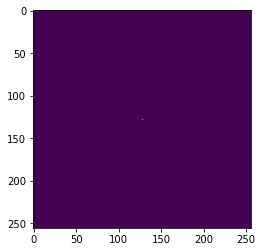

In [35]:
plt.imshow(np.abs(mask_fourier)**2)

Check the result and comment.

In [34]:
#The image should be blurry and the edges should have disappeared.